# IBM Capstone Project- To Depict a relationship between Neighbourhoods where Homicides Occur in Toronto

This project aims to analyse if there is a relation between the different neighbourhoods in Toronto and their homicide (murder) rates. It clusters similar neighbourhoods based on venues called by the Foursquare API by using K-Means Clustering. It then narrows down the focus of to check whether neighbourhoods with higher homicide rates have more medical facilities present.

## Importing libraries

In [ ]:
import numpy as np

import pandas as pd

import json

from geopy.geocoders import Nominatim #convert address into latitude and longitude

import requests

#to transform json into pandas dataframe
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import folium

## Reading CSV File 

Data Downloaded from Toronto Police's Public Safety Data Portal

In [119]:
df=pd.read_csv('Homicide.csv')
df.head()

,X,Y,Index_,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.386620,43.648640,201,1787320,2006,D52,Shooting,2006-10-27T04:00:00.000Z,77,Waterfront Communities-The Island (77),43.648640,-79.386620,1
1,-79.304939,43.715988,202,1470621,2006,D54,Stabbing,2006-11-05T05:00:00.000Z,43,Victoria Village (43),43.715988,-79.304939,2
2,-79.304939,43.715988,203,1470621,2006,D54,Stabbing,2006-11-05T05:00:00.000Z,43,Victoria Village (43),43.715988,-79.304939,3
3,-79.228691,43.809391,204,1448992,2006,D42,Shooting,2006-11-14T05:00:00.000Z,132,Malvern (132),43.809391,-79.228691,4
4,-79.484482,43.649334,205,1945800,2006,D11,Other,2006-11-25T05:00:00.000Z,87,High Park-Swansea (87),43.649334,-79.484482,5


## Data Pre-Processing

In [120]:
columns=df.columns
print(columns)

Index([u'X', u'Y', u'Index_', u'Event_Unique_ID', u'Occurrence_year',
       u'Division', u'Homicide_Type', u'Occurrence_Date', u'Hood_ID',
       u'Neighbourhood', u'Lat', u'Long', u'ObjectId'],
      dtype='object')


In [121]:
df.shape

(1093, 13)

In [145]:
df.isna().sum()

Event_Unique_ID    0
Occurrence_year    0
Division           0
Homicide_Type      0
Occurrence_Date    0
Hood_ID            0
Neighbourhood      0
Lat                0
Long               0
dtype: int64

In [122]:
dropc=['Index_','ObjectId','X','Y']
df=df.drop(columns=dropc, axis=1)
df.head()

,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long
0,1787320,2006,D52,Shooting,2006-10-27T04:00:00.000Z,77,Waterfront Communities-The Island (77),43.648640,-79.386620
1,1470621,2006,D54,Stabbing,2006-11-05T05:00:00.000Z,43,Victoria Village (43),43.715988,-79.304939
2,1470621,2006,D54,Stabbing,2006-11-05T05:00:00.000Z,43,Victoria Village (43),43.715988,-79.304939
3,1448992,2006,D42,Shooting,2006-11-14T05:00:00.000Z,132,Malvern (132),43.809391,-79.228691
4,1945800,2006,D11,Other,2006-11-25T05:00:00.000Z,87,High Park-Swansea (87),43.649334,-79.484482


## Analysing the Occurence Years

In [93]:
df['Occurrence_year'].unique()

array([2006, 2007, 2008, 2005, 2016, 2014, 2017, 2015, 2013, 2009, 2011,
       2018, 2010, 2004, 2012, 2019], dtype=int64)

Thus we can conclude that the above data lists the homicides from the year of 2004 to 2019

In [433]:
dfyears= df['Occurrence_year'].value_counts(sort=False)

## Visualising the number of Homicides per year using a Bar Graph

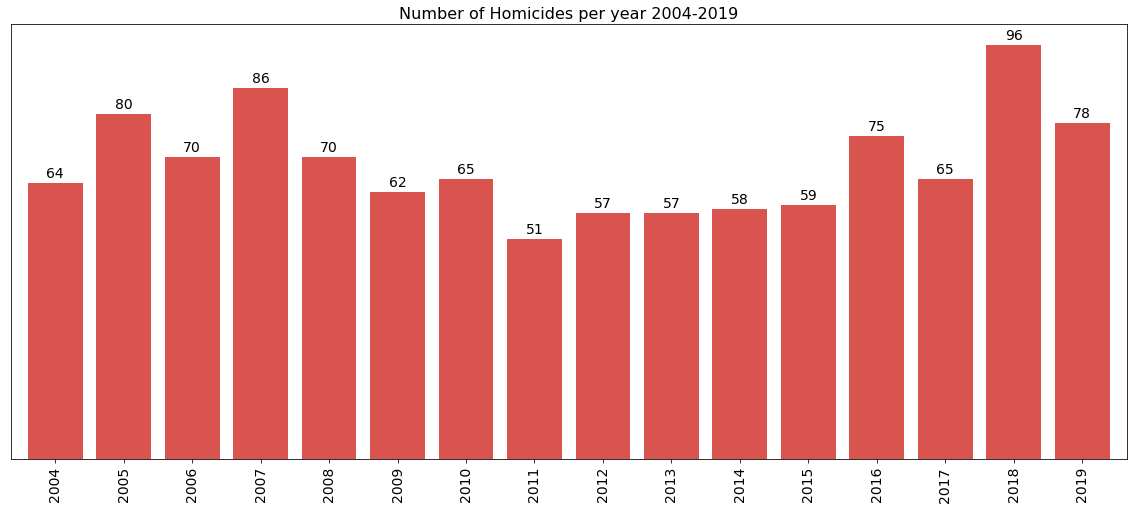

In [434]:
ax = dfyears.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#d9534f'],
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Number of Homicides per year 2004-2019',fontsize=16)

# Setting figure background color
ax.set_facecolor('white')


# Removing the Border 
ax.get_yaxis().set_visible(False)

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

2018 has the highest number of homicides followed by 2007. 

## Visualising the type of Homicide using a Pie Chart

In [65]:
crimetype=df['Homicide_Type'].value_counts()
crimetype

Shooting    570
Other       281
Stabbing    242
Name: Homicide_Type, dtype: int64

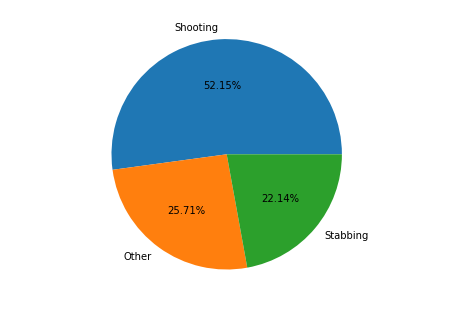

In [88]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ctype= ["Shooting","Other","Stabbing"]
ax.pie(crimetype, labels = ctype,autopct='%1.2f%%')
plt.show()

Over 50% of the homicides were classified under shooting

## Visualing the different Neighbourhoods where there has been a Homicide on the Map

In [162]:
cneighbours=['Neighbourhood','Lat','Long']
dfneighbour=df[cneighbours].groupby(['Neighbourhood'],as_index=False).mean()
dfneighbour['']= [column.split('.')[-1] for column in dataframe_filtered.columns]
dfneighbour

,Neighbourhood,Lat,Long
0,Agincourt North (129),43.807407,-79.281151
1,Agincourt South-Malvern West (128),43.785169,-79.257304
2,Alderwood (20),43.603820,-79.546658
3,Annex (95),43.671229,-79.398903
4,Banbury-Don Mills (42),43.739423,-79.345865
5,Bathurst Manor (34),43.755123,-79.440536
6,Bay Street Corridor (76),43.656469,-79.383525
7,Bayview Village (52),43.773338,-79.383282
8,Bayview Woods-Steeles (49),43.791298,-79.369125
9,Bedford Park-Nortown (39),43.728055,-79.422084


In [515]:
# create map of Toronto using latitude and longitude values
lat_tor=43.6534817
lon_tor=-79.3839347

map_toronto = folium.Map(location=[(lat_tor), lon_tor], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(dfneighbour['Lat'], dfneighbour['Long'], dfneighbour['Neighbourhood']):
    
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FFCCCB',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Visualising the 10 Neighbourhoods with most number of Homicides

In [399]:
neighbour=df['Neighbourhood'].value_counts()
neighbour

Mount Olive-Silverstone-Jamestown (2)       31
Glenfield-Jane Heights (25)                 29
Moss Park (73)                              29
Malvern (132)                               29
Downsview-Roding-CFB (26)                   26
Church-Yonge Corridor (75)                  24
South Riverdale (70)                        22
Dovercourt-Wallace Emerson-Junction (93)    22
Woburn (137)                                21
Rouge (131)                                 21
Black Creek (24)                            21
Regent Park (72)                            20
Weston (113)                                19
Kensington-Chinatown (78)                   19
Waterfront Communities-The Island (77)      17
West Humber-Clairville (1)                  16
Bay Street Corridor (76)                    16
Wexford/Maryvale (119)                      15
Clairlea-Birchmount (120)                   15
Humber Summit (21)                          15
Rockcliffe-Smythe (111)                     15
Niagara (82) 

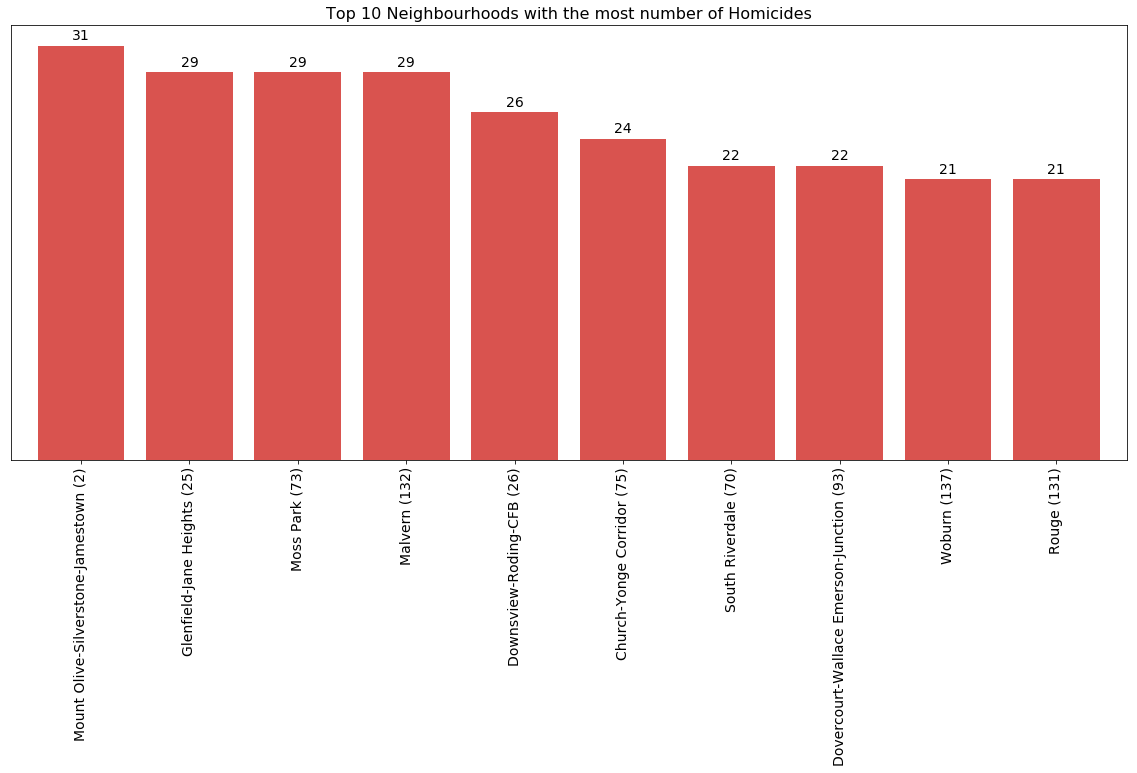

In [432]:
ax = neighbour[0:10].plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#d9534f'],
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Top 10 Neighbourhoods with the most number of Homicides',fontsize=16)

# Setting figure background color
ax.set_facecolor('white')


# Removing the Border 
ax.get_yaxis().set_visible(False)

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

In [509]:
df_totalhom=df.Neighbourhood.value_counts().rename_axis('Neighbourhood').reset_index(name='Total_Homicides')
dfneighbourstotalhom=df_totalhom
dfneighbourstotalhom=dfneighbourstotalhom.join(dfneighbour.set_index('Neighbourhood'), on='Neighbourhood')
top10=dfneighbourstotalhom.head(10)
bottom10=dfneighbourstotalhom.tail(10)
dfneighbourstotalhom.head()

,Neighbourhood,Total_Homicides,Lat,Long
0,Mount Olive-Silverstone-Jamestown (2),31,43.741235,-79.586540
1,Glenfield-Jane Heights (25),29,43.747827,-79.512755
2,Moss Park (73),29,43.655816,-79.369886
3,Malvern (132),29,43.806418,-79.219773
4,Downsview-Roding-CFB (26),26,43.728980,-79.500555


## Retrieving Venues Present in these Neighbourhoods using the Foursquare API

In [353]:
# Define Foursquare Credentials and Version
LIMIT = 100

CLIENT_ID = 'LPFYDO0GVMD4PSHPJATGKYZQXBZ2VDHHQVHTLZ2ZCEEMPY5D' # your Foursquare ID
CLIENT_SECRET = 'Y2QWIWVI4WAFJQNEQVKWCRISFKQ2C0DZHBF4HRQDG0AAYCTB' # your Foursquare Secret
VERSION = '20191231' # Foursquare API version
search_query='medical'
category='4bf58dd8d48988d104941735'
local='browse'

In [351]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
       
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                 'Venue Category']
    
    return(nearby_venues)

In [219]:
toronto_venues = getNearbyVenues(names=dfneighbour['Neighbourhood'],
                                   latitudes=dfneighbour['Lat'],
                                   longitudes=dfneighbour['Long'],
                                  )

Agincourt North (129)
Agincourt South-Malvern West (128)
Alderwood (20)
Annex (95)
Banbury-Don Mills (42)
Bathurst Manor (34)
Bay Street Corridor (76)
Bayview Village (52)
Bayview Woods-Steeles (49)
Bedford Park-Nortown (39)
Beechborough-Greenbrook (112)
Bendale (127)
Birchcliffe-Cliffside (122)
Black Creek (24)
Blake-Jones (69)
Briar Hill-Belgravia (108)
Broadview North (57)
Brookhaven-Amesbury (30)
Cabbagetown-South St.James Town (71)
Caledonia-Fairbank (109)
Casa Loma (96)
Centennial Scarborough (133)
Church-Yonge Corridor (75)
Clairlea-Birchmount (120)
Clanton Park (33)
Cliffcrest (123)
Corso Italia-Davenport (92)
Danforth (66)
Don Valley Village (47)
Dorset Park (126)
Dovercourt-Wallace Emerson-Junction (93)
Downsview-Roding-CFB (26)
Dufferin Grove (83)
East End-Danforth (62)
Edenbridge-Humber Valley (9)
Eglinton East (138)
Elms-Old Rexdale (5)
Englemount-Lawrence (32)
Eringate-Centennial-West Deane (11)
Etobicoke West Mall (13)
Flemingdon Park (44)
Forest Hill North (102)
Glenfie

In [220]:
toronto_venues.shape

(2471, 7)

In [352]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North (129),43.807407,-79.281151,Fahmee Bakery & Jamaican Foods,43.810170,-79.280113,Caribbean Restaurant
1,Agincourt North (129),43.807407,-79.281151,Dolly's Crafts & Sports Cards,43.809942,-79.279811,Hobby Shop
2,Agincourt North (129),43.807407,-79.281151,Rosewood Plaza,43.810271,-79.279965,Shop & Service
3,Agincourt North (129),43.807407,-79.281151,Reginos Pizza,43.810560,-79.280120,Pizza Place
4,Agincourt South-Malvern West (128),43.785169,-79.257304,The Roti Hut,43.787277,-79.258724,Caribbean Restaurant


## Checking the number of venues retrieved for each Neighbourhood

In [384]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North (129),4,4,4,4,4,4
Agincourt South-Malvern West (128),13,13,13,13,13,13
Alderwood (20),10,10,10,10,10,10
Annex (95),61,61,61,61,61,61
Banbury-Don Mills (42),23,23,23,23,23,23
Bathurst Manor (34),21,21,21,21,21,21
Bay Street Corridor (76),72,72,72,72,72,72
Bayview Village (52),11,11,11,11,11,11
Bayview Woods-Steeles (49),18,18,18,18,18,18


In [385]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 290 uniques categories.


### One Hot encoding of the different venue categories

In [390]:
toronto=pd.get_dummies(toronto_venues[['Venue Category']], prefix='', prefix_sep="")
toronto['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto.columns[-1]] + list(toronto.columns[:-1])
toronto= toronto[fixed_columns]

toronto.head()

,Zoo Exhibit,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [391]:
toronto_grouped = toronto.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North (129),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,Agincourt South-Malvern West (128),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,Alderwood (20),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,Annex (95),0.0,0.0,0.000000,0.0,0.0,0.016393,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,Banbury-Don Mills (42),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.043478,0.000000
5,Bathurst Manor (34),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.047619,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
6,Bay Street Corridor (76),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.013889,0.000000,0.013889,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
7,Bayview Village (52),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,Bayview Woods-Steeles (49),0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.000000,0.111111,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9,Bedford Park-Nortown (39),0.0,0.0,0.000000,0.0,0.0,0.045455,0.0,0.0,0.00000,...,0.000000,0.045455,0.000000,0.00,0.0,0.000000,0.0,0.045455,0.000000,0.000000


## Checking the most common venues in each location

In [404]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [519]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agincourt North (129),Caribbean Restaurant,Pizza Place,Hobby Shop
1,Agincourt South-Malvern West (128),Gym / Fitness Center,Breakfast Spot,Sporting Goods Shop
2,Alderwood (20),Pizza Place,Skating Rink,Pharmacy
3,Annex (95),Coffee Shop,Italian Restaurant,Restaurant
4,Banbury-Don Mills (42),Coffee Shop,Shoe Store,Gourmet Shop


## Creating Clusters using K-Means

In [429]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [431]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = dfneighbourstotalhom


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

## Checking the clusters Neighbourhoods with the Most Homicides Belong to

In [425]:
toronto_merged.head(10)

,Neighbourhood,Total_Homicides,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mount Olive-Silverstone-Jamestown (2),31,43.741235,-79.586540,1.0,Grocery Store,Discount Store,Pizza Place,Pharmacy,Beer Store,Sandwich Place,Fast Food Restaurant,Hardware Store,Gym Pool,Fried Chicken Joint
1,Glenfield-Jane Heights (25),29,43.747827,-79.512755,3.0,Pool,Tea Room,Park,Plaza,History Museum,Event Space,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School
2,Moss Park (73),29,43.655816,-79.369886,1.0,Italian Restaurant,Diner,Coffee Shop,Sandwich Place,Thai Restaurant,Café,Yoga Studio,Bus Stop,Food Truck,Breakfast Spot
3,Malvern (132),29,43.806418,-79.219773,1.0,Pizza Place,Fast Food Restaurant,Gym / Fitness Center,Pharmacy,Bubble Tea Shop,Restaurant,Sandwich Place,Skating Rink,Convenience Store,Grocery Store
4,Downsview-Roding-CFB (26),26,43.728980,-79.500555,3.0,Park,Food Truck,Construction & Landscaping,Yoga Studio,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market
5,Church-Yonge Corridor (75),24,43.661839,-79.380514,1.0,Coffee Shop,Japanese Restaurant,Spa,Diner,Burger Joint,Thai Restaurant,Falafel Restaurant,Bar,Sandwich Place,Ramen Restaurant
6,South Riverdale (70),22,43.658726,-79.343864,1.0,Café,Bar,American Restaurant,Coffee Shop,Sandwich Place,Bakery,Seafood Restaurant,Taco Place,Falafel Restaurant,Italian Restaurant
7,Dovercourt-Wallace Emerson-Junction (93),22,43.664924,-79.437863,1.0,Park,Pharmacy,Art Gallery,Bus Line,Brazilian Restaurant,Smoke Shop,Café,Bank,Grocery Store,Gym
8,Woburn (137),21,43.764375,-79.227659,1.0,Indian Restaurant,Bank,Coffee Shop,Bakery,Vietnamese Restaurant,Discount Store,Supermarket,Fast Food Restaurant,Ethiopian Restaurant,Event Service
9,Rouge (131),21,43.813265,-79.193476,2.0,Zoo Exhibit,Farmers Market,Hotel,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Fast Food Restaurant


Most neighbourhoods in this list belong to the 2nd cluster labelled as cluster 1.0. Rouge and Glenfield-Jane Heights lying in different clusters. 

In [421]:
toronto_merged.isna().sum()

Neighbourhood             0
Total_Homicides           0
Lat                       0
Long                      0
Cluster Labels            1
1st Most Common Venue     1
2nd Most Common Venue     1
3rd Most Common Venue     1
4th Most Common Venue     1
5th Most Common Venue     1
6th Most Common Venue     1
7th Most Common Venue     1
8th Most Common Venue     1
9th Most Common Venue     1
10th Most Common Venue    1
dtype: int64

In [516]:
toronto_merged=toronto_merged.dropna()
top10clusters=toronto_merged.head(10)

## Plotting the Clusters

In [424]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Lat'], toronto_merged['Long'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### From the above map we can see that majority neighbourhoods where homicides has occured in Toronto have been clustered into 1 group together based on their venues. This can be used to argue that neighbourhoods where homicides occur are similar in nature in terms of the venues present.

## Viewing all Neighbourhoods that belong in Cluster 2

In [520]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Total_Homicides,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,31,Grocery Store,Discount Store,Pizza Place,Pharmacy,Beer Store,Sandwich Place,Fast Food Restaurant,Hardware Store,Gym Pool,Fried Chicken Joint
2,29,Italian Restaurant,Diner,Coffee Shop,Sandwich Place,Thai Restaurant,Café,Yoga Studio,Bus Stop,Food Truck,Breakfast Spot
3,29,Pizza Place,Fast Food Restaurant,Gym / Fitness Center,Pharmacy,Bubble Tea Shop,Restaurant,Sandwich Place,Skating Rink,Convenience Store,Grocery Store
5,24,Coffee Shop,Japanese Restaurant,Spa,Diner,Burger Joint,Thai Restaurant,Falafel Restaurant,Bar,Sandwich Place,Ramen Restaurant
6,22,Café,Bar,American Restaurant,Coffee Shop,Sandwich Place,Bakery,Seafood Restaurant,Taco Place,Falafel Restaurant,Italian Restaurant
7,22,Park,Pharmacy,Art Gallery,Bus Line,Brazilian Restaurant,Smoke Shop,Café,Bank,Grocery Store,Gym
8,21,Indian Restaurant,Bank,Coffee Shop,Bakery,Vietnamese Restaurant,Discount Store,Supermarket,Fast Food Restaurant,Ethiopian Restaurant,Event Service
10,21,Chinese Restaurant,Pharmacy,Shopping Mall,Athletics & Sports,Gas Station,Yoga Studio,Exhibit,Ethiopian Restaurant,Event Service,Event Space
11,20,Coffee Shop,Thai Restaurant,Pub,Fast Food Restaurant,Food Truck,Electronics Store,Sushi Restaurant,Beer Store,Restaurant,Auto Dealership
12,19,Coffee Shop,Train Station,Pharmacy,Discount Store,Soccer Field,Skating Rink,Fried Chicken Joint,Café,Laundromat,Sandwich Place


In [522]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Total_Homicides,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,29,Pool,Tea Room,Park,Plaza,History Museum,Event Space,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School
4,26,Park,Food Truck,Construction & Landscaping,Yoga Studio,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market
17,15,Pool,Yoga Studio,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant
20,15,Pizza Place,Park,Supermarket,Beer Store,Coffee Shop,Asian Restaurant,Farmers Market,Event Service,Event Space,Exhibit
23,14,Park,Bus Line,Coffee Shop,Fast Food Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market
53,7,Theater,Poutine Place,Baseball Field,Park,Yoga Studio,Farmers Market,Ethiopian Restaurant,Event Service,Event Space,Exhibit
56,7,Park,Pizza Place,Gas Station,Yoga Studio,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant
59,6,Thai Restaurant,Café,Diner,Park,Farmers Market,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Exhibit
68,6,Park,Electronics Store,Hookah Bar,Hot Dog Joint,Skating Rink,Athletics & Sports,Falafel Restaurant,Elementary School,Ethiopian Restaurant,Event Service
89,4,Park,Coffee Shop,Sandwich Place,Electronics Store,Fish & Chips Shop,Fireworks Store,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Egyptian Restaurant


## Depicting the Top 10 Neighbourhoods in terms of Homicides

In [517]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(top10clusters['Lat'], top10clusters['Long'], top10clusters['Neighbourhood'], top10clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Retrieving all the Medical Centers from Foursquare

### Toronto City Area

In [465]:
lat=43.6534817
lon=-79.3839347
radius=100000
limit=200
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, limit)
url1

'https://api.foursquare.com/v2/venues/search?client_id=LPFYDO0GVMD4PSHPJATGKYZQXBZ2VDHHQVHTLZ2ZCEEMPY5D&client_secret=Y2QWIWVI4WAFJQNEQVKWCRISFKQ2C0DZHBF4HRQDG0AAYCTB&ll=43.6534817,-79.3839347&v=20191231&query=medical&radius=100000&limit=200'

In [466]:
results = requests.get(url1).json()
results

{u'meta': {u'code': 200, u'requestId': u'5e9d688360ba08001bffd3bf'},
 u'response': {u'venues': [{u'categories': [{u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       u'suffix': u'.png'},
      u'id': u'4bf58dd8d48988d104941735',
      u'name': u'Medical Center',
      u'pluralName': u'Medical Centers',
      u'primary': True,
      u'shortName': u'Medical'}],
    u'hasPerk': False,
    u'id': u'4df0e138d4c04d0392c7e652',
    u'location': {u'address': u'180 Dundas St. W',
     u'cc': u'CA',
     u'city': u'Toronto',
     u'country': u'Canada',
     u'crossStreet': u'at Chestnut St.',
     u'distance': 294,
     u'formattedAddress': [u'180 Dundas St. W (at Chestnut St.)',
      u'Toronto ON',
      u'Canada'],
     u'labeledLatLngs': [{u'label': u'display',
       u'lat': 43.655395,
       u'lng': -79.386459}],
     u'lat': 43.655395,
     u'lng': -79.386459,
     u'state': u'ON'},
    u'name': u'CIRA Medical Centre',
    u'referralId': u'v-1587374252

In [467]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{u'pluralName': u'Medical Centers', u'primary...",False,4df0e138d4c04d0392c7e652,180 Dundas St. W,CA,Toronto,Canada,at Chestnut St.,294,"[180 Dundas St. W (at Chestnut St.), Toronto O...","[{u'lat': 43.655395, u'lng': -79.386459, u'lab...",43.655395,-79.386459,NaN,NaN,ON,CIRA Medical Centre,v-1587374252
1,"[{u'pluralName': u'Medical Centers', u'primary...",False,4cdf5495f8cdb1f738339112,30 Bond St.,CA,Toronto,Canada,NaN,421,"[30 Bond St., Toronto ON, Canada]","[{u'lat': 43.6536844438, u'lng': -79.378705693...",43.653684,-79.378706,NaN,NaN,ON,St Michael's Hospital Medical Imaging,v-1587374252
2,"[{u'pluralName': u'Medical Centers', u'primary...",False,4bd8761309ecb713ffe6487c,"150 York Street, Suite 910",CA,Toronto,Canada,Adelaide Street,433,"[150 York Street, Suite 910 (Adelaide Street),...","[{u'lat': 43.6496042469, u'lng': -79.384442403...",43.649604,-79.384442,NaN,M5H 3S5,ON,The Toronto Centre For Medical Imaging,v-1587374252
3,"[{u'pluralName': u'Medical Labs', u'primary': ...",False,55ace30f498e675077de6b47,11 King St West,CA,Toronto,Canada,NaN,699,"[11 King St West, Toronto ON, Canada]","[{u'lat': 43.648542, u'lng': -79.37856, u'labe...",43.648542,-79.378560,NaN,NaN,ON,Oxford Medical Imaging,v-1587374252
4,"[{u'pluralName': u'Medical Centers', u'primary...",False,4f92e56de4b04c3ff96a5aa5,80 Carlton Street,CA,Toronto,Canada,Church Street,995,"[80 Carlton Street (Church Street), Toronto ON...","[{u'lat': 43.6619120316, u'lng': -79.379797619...",43.661912,-79.379798,NaN,NaN,ON,Carlton + Church Medical Clinic,v-1587374252


In [471]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
c=dataframe_filtered.columns
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,CIRA Medical Centre,Medical Center,180 Dundas St. W,CA,Toronto,Canada,at Chestnut St.,294,"[180 Dundas St. W (at Chestnut St.), Toronto O...","[{u'lat': 43.655395, u'lng': -79.386459, u'lab...",43.655395,-79.386459,NaN,NaN,ON,4df0e138d4c04d0392c7e652
1,St Michael's Hospital Medical Imaging,Medical Center,30 Bond St.,CA,Toronto,Canada,NaN,421,"[30 Bond St., Toronto ON, Canada]","[{u'lat': 43.6536844438, u'lng': -79.378705693...",43.653684,-79.378706,NaN,NaN,ON,4cdf5495f8cdb1f738339112
2,The Toronto Centre For Medical Imaging,Medical Center,"150 York Street, Suite 910",CA,Toronto,Canada,Adelaide Street,433,"[150 York Street, Suite 910 (Adelaide Street),...","[{u'lat': 43.6496042469, u'lng': -79.384442403...",43.649604,-79.384442,NaN,M5H 3S5,ON,4bd8761309ecb713ffe6487c
3,Oxford Medical Imaging,Medical Lab,11 King St West,CA,Toronto,Canada,NaN,699,"[11 King St West, Toronto ON, Canada]","[{u'lat': 43.648542, u'lng': -79.37856, u'labe...",43.648542,-79.378560,NaN,NaN,ON,55ace30f498e675077de6b47
4,Carlton + Church Medical Clinic,Medical Center,80 Carlton Street,CA,Toronto,Canada,Church Street,995,"[80 Carlton Street (Church Street), Toronto ON...","[{u'lat': 43.6619120316, u'lng': -79.379797619...",43.661912,-79.379798,NaN,NaN,ON,4f92e56de4b04c3ff96a5aa5
5,Maple Leaf Medical Clinic,Medical Center,14 College St,CA,Toronto,Canada,Yonge St,886,"[14 College St (Yonge St), Toronto ON, Canada]","[{u'lat': 43.661448094, u'lng': -79.3837111991...",43.661448,-79.383711,NaN,NaN,ON,50772cc5498eb6cb971c71b8
6,Medical Sciences Building,Medical School,1 King's College Circle,CA,Toronto,Canada,University of Toronto,1188,[1 King's College Circle (University of Toront...,"[{u'lat': 43.6613615431, u'lng': -79.393900433...",43.661362,-79.393900,NaN,M5S 1A8,ON,4adc80b5f964a520bb2c21e3
7,Queen Spadina Medical Centre,Doctor's Office,455 Queen St. W,CA,Toronto,Canada,NaN,1191,"[455 Queen St. W, Toronto ON M5V 2A9, Canada]","[{u'lat': 43.6485780653, u'lng': -79.397087588...",43.648578,-79.397088,NaN,M5V 2A9,ON,4b143a52f964a5209d9f23e3
8,491 Medical Centre,None,NaN,CA,NaN,Canada,NaN,1368,[Canada],"[{u'lat': 43.6654753376, u'lng': -79.380215508...",43.665475,-79.380216,NaN,NaN,NaN,4c0eaa8cc6cf76b0da198151
9,Medical Building,Doctor's Office,123 Edward St,CA,Toronto,Canada,University and Edward,349,"[123 Edward St (University and Edward), Toront...","[{u'lat': 43.6558129955, u'lng': -79.386843777...",43.655813,-79.386844,NaN,NaN,ON,4bb10c59f964a520be753ce3


In [472]:
d=['cc','city','country','crossStreet','distance','labeledLatLngs','state','neighborhood','postalCode','id','address','formattedAddress']
dataframe_filtered=dataframe_filtered.drop(d,axis=1)
dataframe_filtered

,name,categories,lat,lng
0,CIRA Medical Centre,Medical Center,43.655395,-79.386459
1,St Michael's Hospital Medical Imaging,Medical Center,43.653684,-79.378706
2,The Toronto Centre For Medical Imaging,Medical Center,43.649604,-79.384442
3,Oxford Medical Imaging,Medical Lab,43.648542,-79.378560
4,Carlton + Church Medical Clinic,Medical Center,43.661912,-79.379798
5,Maple Leaf Medical Clinic,Medical Center,43.661448,-79.383711
6,Medical Sciences Building,Medical School,43.661362,-79.393900
7,Queen Spadina Medical Centre,Doctor's Office,43.648578,-79.397088
8,491 Medical Centre,None,43.665475,-79.380216
9,Medical Building,Doctor's Office,43.655813,-79.386844


### Scarborough District Area

In [477]:
lat=43.7764
lon=-79.2318
radius=17000
limit=200
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, limit)
url2

'https://api.foursquare.com/v2/venues/search?client_id=LPFYDO0GVMD4PSHPJATGKYZQXBZ2VDHHQVHTLZ2ZCEEMPY5D&client_secret=Y2QWIWVI4WAFJQNEQVKWCRISFKQ2C0DZHBF4HRQDG0AAYCTB&ll=43.7764,-79.2318&v=20191231&query=medical&radius=17000&limit=200'

In [478]:
results1 = requests.get(url2).json()
results1

{u'meta': {u'code': 200, u'requestId': u'5e9d69e95fb726001ba761b9'},
 u'response': {u'venues': [{u'categories': [],
    u'hasPerk': False,
    u'id': u'4c0bc855340720a140938893',
    u'location': {u'cc': u'CA',
     u'country': u'Canada',
     u'distance': 116,
     u'formattedAddress': [u'Canada'],
     u'labeledLatLngs': [{u'label': u'display',
       u'lat': 43.777325,
       u'lng': -79.23249}],
     u'lat': 43.777325,
     u'lng': -79.23249},
    u'name': u"Dr. Patel's Medical Office",
    u'referralId': u'v-1587374406'},
   {u'categories': [{u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       u'suffix': u'.png'},
      u'id': u'4bf58dd8d48988d177941735',
      u'name': u"Doctor's Office",
      u'pluralName': u"Doctor's Offices",
      u'primary': True,
      u'shortName': u"Doctor's Office"}],
    u'hasPerk': False,
    u'id': u'4c94c289f7cfa1cd9084b615',
    u'location': {u'address': u'1711 McCowan Road',
     u'cc': u'CA',
   

In [479]:
# assign relevant part of JSON to venues
venues1 = results1['response']['venues']

# tranform venues into a dataframe
dataframesc = json_normalize(venues1)
dataframesc.head(5)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,[],False,4c0bc855340720a140938893,NaN,CA,NaN,Canada,NaN,116,[Canada],"[{u'lat': 43.777325, u'lng': -79.23249, u'labe...",43.777325,-79.232490,NaN,NaN,Dr. Patel's Medical Office,v-1587374406
1,"[{u'pluralName': u'Doctor's Offices', u'primar...",False,4c94c289f7cfa1cd9084b615,1711 McCowan Road,CA,Toronto,Canada,Sheppard Ave East,2525,"[1711 McCowan Road (Sheppard Ave East), Toront...","[{u'lat': 43.78887856, u'lng': -79.2580416776,...",43.788879,-79.258042,NaN,ON,McCowan Medical Professional Centre,v-1587374406
2,"[{u'pluralName': u'Doctor's Offices', u'primar...",False,4bf1cff0a09076b040ee29d4,1755 Brimley Road,CA,Scarborough,Canada,at Real Canadian Superstore,2482,[1755 Brimley Road (at Real Canadian Superstor...,"[{u'lat': 43.778226484, u'lng': -79.2625772544...",43.778226,-79.262577,M1J 1B4,ON,One Care Medical Clinic,v-1587374406
3,"[{u'pluralName': u'Medical Centers', u'primary...",False,51f0120d498ec771014692a3,1200 Markham Rd suite 304,CA,Scarborough,Canada,NaN,650,"[1200 Markham Rd suite 304, Scarborough ON m1h...","[{u'lat': 43.7819988608, u'lng': -79.234098541...",43.781999,-79.234099,m1h3c3,ON,Aldgate Medical Clinic,v-1587374406
4,[],False,4d0953690ead8cfa52e5f476,2867 Lawrence Ave East,CA,Toronto,Canada,at Brimley,3094,"[2867 Lawrence Ave East (at Brimley), Toronto ...","[{u'lat': 43.753559, u'lng': -79.25375, u'labe...",43.753559,-79.253750,M1P 2T2,ON,Hillside Medical Centre,v-1587374406


In [480]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns1 = ['name', 'categories'] + [col for col in dataframesc.columns if col.startswith('location.')] + ['id']
dataframesc_filtered = dataframesc.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframesc_filtered['categories'] = dataframesc_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframesc_filtered.columns = [column.split('.')[-1] for column in dataframesc_filtered.columns]
c=dataframesc_filtered.columns
dataframesc_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Dr. Patel's Medical Office,None,NaN,CA,NaN,Canada,NaN,116,[Canada],"[{u'lat': 43.777325, u'lng': -79.23249, u'labe...",43.777325,-79.232490,NaN,NaN,4c0bc855340720a140938893
1,McCowan Medical Professional Centre,Doctor's Office,1711 McCowan Road,CA,Toronto,Canada,Sheppard Ave East,2525,"[1711 McCowan Road (Sheppard Ave East), Toront...","[{u'lat': 43.78887856, u'lng': -79.2580416776,...",43.788879,-79.258042,NaN,ON,4c94c289f7cfa1cd9084b615
2,One Care Medical Clinic,Doctor's Office,1755 Brimley Road,CA,Scarborough,Canada,at Real Canadian Superstore,2482,[1755 Brimley Road (at Real Canadian Superstor...,"[{u'lat': 43.778226484, u'lng': -79.2625772544...",43.778226,-79.262577,M1J 1B4,ON,4bf1cff0a09076b040ee29d4
3,Aldgate Medical Clinic,Medical Center,1200 Markham Rd suite 304,CA,Scarborough,Canada,NaN,650,"[1200 Markham Rd suite 304, Scarborough ON m1h...","[{u'lat': 43.7819988608, u'lng': -79.234098541...",43.781999,-79.234099,m1h3c3,ON,51f0120d498ec771014692a3
4,Hillside Medical Centre,None,2867 Lawrence Ave East,CA,Toronto,Canada,at Brimley,3094,"[2867 Lawrence Ave East (at Brimley), Toronto ...","[{u'lat': 43.753559, u'lng': -79.25375, u'labe...",43.753559,-79.253750,M1P 2T2,ON,4d0953690ead8cfa52e5f476
5,Agincourt Medical Centre,Doctor's Office,2020 Brimley Rd.,CA,Toronto,Canada,at Sheppard Ave. E,3173,"[2020 Brimley Rd. (at Sheppard Ave. E), Toront...","[{u'lat': 43.7874457498, u'lng': -79.268198080...",43.787446,-79.268198,M1S 4R7,ON,4db088134b22ba776d70b209
6,Platinum Medical Centre,Doctor's Office,NaN,CA,Toronto,Canada,NaN,3823,"[Toronto ON, Canada]","[{u'lat': 43.7429464568, u'lng': -79.221045708...",43.742946,-79.221046,NaN,ON,4def946f227170314ba69fe8
7,Milner Medical Centre,Doctor's Office,NaN,CA,NaN,Canada,NaN,3755,"[Ontario, Canada]","[{u'lat': 43.7996322345, u'lng': -79.197909661...",43.799632,-79.197910,NaN,Ontario,4cfa56e2c51fa1cd7610e02b
8,Appletree Medical Centre,Medical Center,4-4218 LAWRENCE AVE E,CA,Scarborough,Canada,NaN,3869,"[4-4218 LAWRENCE AVE E, Scarborough ON M1E 4X9...","[{u'lat': 43.7693548, u'lng': -79.1846622, u'l...",43.769355,-79.184662,M1E 4X9,ON,4b9915bdf964a520556035e3
9,Blue Rose Medical Centre,Doctor's Office,1910 Kennedy Rd Unit 4,CA,Scarborough,Canada,NaN,4120,"[1910 Kennedy Rd Unit 4, Scarborough ON M1P 2L...","[{u'lat': 43.7661662731, u'lng': -79.281055927...",43.766166,-79.281056,M1P 2L8,ON,53a0f885498e45944ff33418


In [483]:
d1=['cc','city','country','crossStreet','distance','labeledLatLngs','state','postalCode','id','address','formattedAddress']
dataframesc_filtered=dataframesc_filtered.drop(d1,axis=1)
dataframesc_filtered

,name,categories,lat,lng
0,Dr. Patel's Medical Office,None,43.777325,-79.232490
1,McCowan Medical Professional Centre,Doctor's Office,43.788879,-79.258042
2,One Care Medical Clinic,Doctor's Office,43.778226,-79.262577
3,Aldgate Medical Clinic,Medical Center,43.781999,-79.234099
4,Hillside Medical Centre,None,43.753559,-79.253750
5,Agincourt Medical Centre,Doctor's Office,43.787446,-79.268198
6,Platinum Medical Centre,Doctor's Office,43.742946,-79.221046
7,Milner Medical Centre,Doctor's Office,43.799632,-79.197910
8,Appletree Medical Centre,Medical Center,43.769355,-79.184662
9,Blue Rose Medical Centre,Doctor's Office,43.766166,-79.281056


### York Area

In [496]:
lat=43.740451
lon= -79.545268
radius=50000
limit=200
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, limit)
url2

'https://api.foursquare.com/v2/venues/search?client_id=LPFYDO0GVMD4PSHPJATGKYZQXBZ2VDHHQVHTLZ2ZCEEMPY5D&client_secret=Y2QWIWVI4WAFJQNEQVKWCRISFKQ2C0DZHBF4HRQDG0AAYCTB&ll=43.740451,-79.545268&v=20191231&query=medical&radius=50000&limit=200'

In [497]:
results2 = requests.get(url2).json()
results2

{u'meta': {u'code': 200, u'requestId': u'5e9d6c06df2774001b3910c6'},
 u'response': {u'venues': [{u'categories': [],
    u'hasPerk': False,
    u'id': u'4c0525d1f423a5930188d216',
    u'location': {u'address': u'Finch ave west & weston road',
     u'cc': u'CA',
     u'city': u'Toronto',
     u'country': u'Canada',
     u'distance': 1237,
     u'formattedAddress': [u'Finch ave west & weston road',
      u'Toronto ON',
      u'Canada'],
     u'labeledLatLngs': [{u'label': u'display',
       u'lat': 43.75155426106288,
       u'lng': -79.54446382053106}],
     u'lat': 43.75155426106288,
     u'lng': -79.54446382053106,
     u'state': u'ON'},
    u'name': u'Dr choe medical centre',
    u'referralId': u'v-1587374940'},
   {u'categories': [{u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       u'suffix': u'.png'},
      u'id': u'4bf58dd8d48988d10f951735',
      u'name': u'Pharmacy',
      u'pluralName': u'Pharmacies',
      u'primary': True,
      u'shortName':

In [498]:
# assign relevant part of JSON to venues
venues2 = results2['response']['venues']

# tranform venues into a dataframe
dataframesil = json_normalize(venues2)
dataframesil.head(5)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,[],False,4c0525d1f423a5930188d216,Finch ave west & weston road,CA,Toronto,Canada,NaN,1237,"[Finch ave west & weston road, Toronto ON, Can...","[{u'lat': 43.7515542611, u'lng': -79.544463820...",43.751554,-79.544464,NaN,NaN,ON,Dr choe medical centre,v-1587374940,NaN
1,"[{u'pluralName': u'Pharmacies', u'primary': Tr...",False,4bc777d66501c9b6937d3e29,2367 Finch Ave W,CA,North York,Canada,NaN,1272,"[2367 Finch Ave W, North York ON M9M 2W8, Canada]","[{u'lat': 43.7518008987, u'lng': -79.543338630...",43.751801,-79.543339,NaN,M9M 2W8,ON,Finch Weston Medical Pharmacy,v-1587374940,NaN
2,"[{u'pluralName': u'Doctor's Offices', u'primar...",False,4cd94e1c3ec4b1f7d4d1c23f,2100 Finch Avenue W,CA,Toronto,Canada,NaN,2381,"[2100 Finch Avenue W, Toronto ON, Canada]","[{u'lat': 43.7558518067, u'lng': -79.524704362...",43.755852,-79.524704,NaN,NaN,ON,Norfinch Medical Centre,v-1587374940,NaN
3,[],False,4d431e1458e9b1f79c49e0ce,NaN,CA,Toronto,Canada,Weston and Bradstock,463,"[Toronto ON, Canada]","[{u'lat': 43.7392296685, u'lng': -79.539759885...",43.739230,-79.539760,NaN,NaN,ON,Woodview Medical Clinic,v-1587374940,NaN
4,"[{u'pluralName': u'Miscellaneous Shops', u'pri...",False,4f2835d1e4b08c1606047b5e,"700 University Ave, University of Toronto",CA,Toronto,Canada,NaN,5390,"[700 University Ave, University of Toronto, To...","[{u'lat': 43.7264481637, u'lng': -79.481113241...",43.726448,-79.481113,NaN,M5G 1Z5,ON,Medical Canada,v-1587374940,NaN


In [502]:

filtered_columns1 = ['name', 'categories'] + [col for col in dataframesil.columns if col.startswith('location.')] + ['id']
dataframesil_filtered = dataframesil.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframesil_filtered['categories'] = dataframesil_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframesil_filtered.columns = [column.split('.')[-1] for column in dataframesil_filtered.columns]
c=dataframesil_filtered.columns
dataframesil_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Dr choe medical centre,None,Finch ave west & weston road,CA,Toronto,Canada,NaN,1237,"[Finch ave west & weston road, Toronto ON, Can...","[{u'lat': 43.7515542611, u'lng': -79.544463820...",43.751554,-79.544464,NaN,NaN,ON,4c0525d1f423a5930188d216
1,Finch Weston Medical Pharmacy,Pharmacy,2367 Finch Ave W,CA,North York,Canada,NaN,1272,"[2367 Finch Ave W, North York ON M9M 2W8, Canada]","[{u'lat': 43.7518008987, u'lng': -79.543338630...",43.751801,-79.543339,NaN,M9M 2W8,ON,4bc777d66501c9b6937d3e29
2,Norfinch Medical Centre,Doctor's Office,2100 Finch Avenue W,CA,Toronto,Canada,NaN,2381,"[2100 Finch Avenue W, Toronto ON, Canada]","[{u'lat': 43.7558518067, u'lng': -79.524704362...",43.755852,-79.524704,NaN,NaN,ON,4cd94e1c3ec4b1f7d4d1c23f
3,Woodview Medical Clinic,None,NaN,CA,Toronto,Canada,Weston and Bradstock,463,"[Toronto ON, Canada]","[{u'lat': 43.7392296685, u'lng': -79.539759885...",43.739230,-79.539760,NaN,NaN,ON,4d431e1458e9b1f79c49e0ce
4,Medical Canada,Miscellaneous Shop,"700 University Ave, University of Toronto",CA,Toronto,Canada,NaN,5390,"[700 University Ave, University of Toronto, To...","[{u'lat': 43.7264481637, u'lng': -79.481113241...",43.726448,-79.481113,NaN,M5G 1Z5,ON,4f2835d1e4b08c1606047b5e
5,Humber Green Medical Centre,Doctor's Office,NaN,CA,NaN,Canada,NaN,4489,"[Ontario, Canada]","[{u'lat': 43.7314573641, u'lng': -79.599679805...",43.731457,-79.599680,NaN,NaN,Ontario,4e67bab8e4cdfdecb06cf20e
6,Appletree Medical Centre,Doctor's Office,900 Albion Road,CA,NaN,Canada,NaN,1284,"[900 Albion Road, Canada]","[{u'lat': 43.7347291406, u'lng': -79.559139414...",43.734729,-79.559139,NaN,NaN,NaN,519cc412498e3dac8ebe5871
7,Medical Centre,Medical Center,4600 Hwy 7,CA,Vaughan,Canada,NaN,9036,"[4600 Hwy 7, Vaughan ON, Canada]","[{u'lat': 43.8082940154, u'lng': -79.483529912...",43.808294,-79.483530,NaN,NaN,ON,4c1f804363750f472b33bb67
8,Alderwood Medical Clinic,Doctor's Office,874 Browns Line,CA,Toronto,Canada,Evans Avenue,14527,"[874 Browns Line (Evans Avenue), Toronto ON M8...","[{u'lat': 43.60998, u'lng': -79.54927, u'label...",43.609980,-79.549270,Alderwood,M8W 3W2,ON,4c698ff41a6620a1cae4638c
9,Albion Finch Medical Centre,Doctor's Office,1620 Albion Road,CA,Toronto,Canada,NaN,4913,"[1620 Albion Road, Toronto ON M9V 4B4, Canada]","[{u'lat': 43.7437679127, u'lng': -79.606190694...",43.743768,-79.606191,NaN,M9V 4B4,ON,4d91083ac479a35d42f17e97


In [503]:
dataframesil_filtered=dataframesil_filtered.drop(d,axis=1)
dataframesil_filtered

,name,categories,lat,lng
0,Dr choe medical centre,None,43.751554,-79.544464
1,Finch Weston Medical Pharmacy,Pharmacy,43.751801,-79.543339
2,Norfinch Medical Centre,Doctor's Office,43.755852,-79.524704
3,Woodview Medical Clinic,None,43.739230,-79.539760
4,Medical Canada,Miscellaneous Shop,43.726448,-79.481113
5,Humber Green Medical Centre,Doctor's Office,43.731457,-79.599680
6,Appletree Medical Centre,Doctor's Office,43.734729,-79.559139
7,Medical Centre,Medical Center,43.808294,-79.483530
8,Alderwood Medical Clinic,Doctor's Office,43.609980,-79.549270
9,Albion Finch Medical Centre,Doctor's Office,43.743768,-79.606191


## Concatenating All Medical Facilities

In [505]:
dataframe_filtered= pd.concat([dataframe_filtered,dataframesc_filtered])
dataframe_filtered= pd.concat([dataframe_filtered,dataframesil_filtered])
dataframe_filtered.shape

(250, 4)

## Plotting the Top 10 and Bottom Neighbourhoods along with Medical Centers

In [518]:
# create map of Toronto using latitude and longitude values
lat_tor=43.6534817
lon_tor=-79.3839347

map_toronto = folium.Map(location=[(lat_tor), lon_tor], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name'], dataframe_filtered['categories']):
    borough= borough.encode('ascii', 'ignore').decode('ascii')
    label = '{},{}'.format(borough,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#98FB98',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
for lat, lng,neighborhood, tot in zip(top10['Lat'], top10['Long'], top10['Neighbourhood'], top10['Total_Homicides']):
    label = '{},{}'.format(neighborhood, tot)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FFCCCB',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
for lat, lng,neighborhood, tot in zip(bottom10['Lat'], bottom10['Long'], bottom10['Neighbourhood'], bottom10['Total_Homicides']):
    label = '{},{}'.format(neighborhood, tot)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#ADD8E6',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)      
    
map_toronto

#### Map
Red- Depicts the neighbourhoods with the highest homicides
<br>
Blue- Depicts the neighbourhoods with 1 homicide
<br>
Green-Depicts Medical Centers
Most densely populated cluster of medical facilities is seen Toronto city which also has the most population density

## Conclusion

Based on the map above we cannot see a clear relation between the number of homicides and the number of medical facilities present but can conclude that neighbourhoods where homicides have taken place do show a pattern of having more medical facilities around them. Further analysis must be done to prove if this hypothesis holds true in other cities as well